In [225]:
import numpy as np
from urllib.request import urlopen
import pandas as pd


import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import datetime
from sklearn import preprocessing
from sklearn.metrics import classification_report


np.random.seed(42)

In [162]:
import numpy as np
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng 
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


In [223]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Count,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


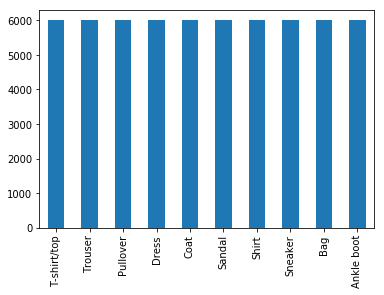

In [227]:
unique, counts = np.unique(Y_train, return_counts=True) # Count the unique values

Y_class_fr = pd.DataFrame(counts, index = class_names)
Y_class_fr = Y_class_fr.rename(columns={0: "Count"})   # Rename the columns

display(Y_class_fr.transpose())                     # Display the count

Y_class_fr.plot.bar(legend = False)     # Create a barplot

In [219]:
X_valid, X_train = X_train[:10000], X_train[10000:] 
Y_valid, Y_train = Y_train[:10000], Y_train[10000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

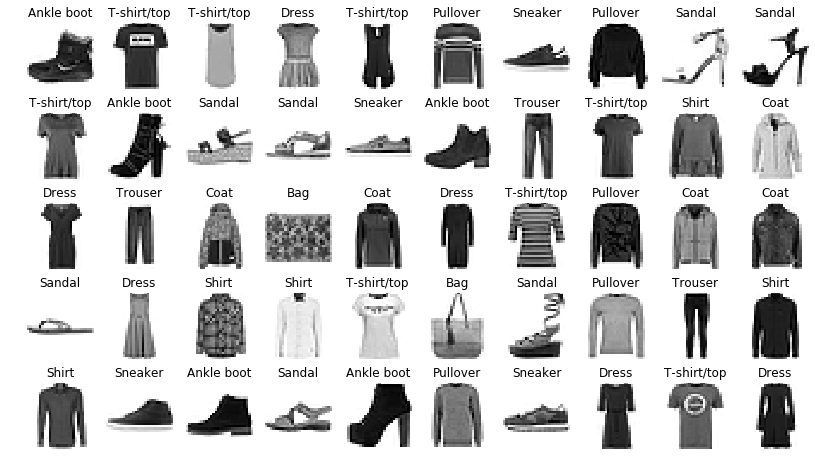

In [228]:
n_rows =5
n_cols=10
plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
for row in range (n_rows):
    for col in range(n_cols):
        index= n_cols*row+col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index].reshape(28,28),cmap="binary",interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[Y_train[index]])
plt.show()

In [220]:
X_train = preprocessing.normalize(X_train)
X_valid = preprocessing.normalize(X_valid)
X_test = preprocessing.normalize(X_test)

## NN with 3layers

### Grid search for number of units

In [59]:
def build_model_n(n_units1=64,n_units2=64):
    model = keras.models.Sequential([
                        
                          keras.layers.Dense(n_units1, activation="relu"),
                          keras.layers.Dense(n_units2, activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")
                                     ])
    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(0.01),
              metrics=["accuracy"])
    
    return model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_n)

C:\Users\Arghavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [60]:
param_distribs = {
    "n_units1": [64,128,256],
    "n_units2": [64,128,256],
    
}

In [61]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(keras_reg, param_distribs)

In [62]:
grid_search.fit(X_train, Y_train, epochs=5,
                validation_data=(X_valid, Y_valid))

C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5571 - accuracy: 0.7945 - val_loss: 0.4644 - val_accuracy: 0.8336
Epoch 2/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4183 - accuracy: 0.8478 - val_loss: 0.3904 - val_accuracy: 0.8613
Epoch 3/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3799 - accuracy: 0.8605 - val_loss: 0.4387 - val_accuracy: 0.8355
Epoch 4/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.3609 - accuracy: 0.8677 - val_loss: 0.4031 - val_accuracy: 0.8577
Epoch 5/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3294 - accuracy: 0.8813


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.5528 - accuracy: 0.7947 - val_loss: 0.4819 - val_accuracy: 0.8265
Epoch 2/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4197 - accuracy: 0.8457 - val_loss: 0.4359 - val_accuracy: 0.8393
Epoch 3/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3867 - accuracy: 0.8550 - val_loss: 0.4423 - val_accuracy: 0.8383
Epoch 4/5
1042/1042 [==============================] - 7s 6ms/step - loss: 0.3637 - accuracy: 0.8637 - val_loss: 0.4081 - val_accuracy: 0.8590
Epoch 5/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3202 - accuracy: 0.8801


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 0.5574 - accuracy: 0.7935 - val_loss: 0.4220 - val_accuracy: 0.8468
Epoch 2/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.4173 - accuracy: 0.8475 - val_loss: 0.3882 - val_accuracy: 0.8537
Epoch 3/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3829 - accuracy: 0.8595 - val_loss: 0.4038 - val_accuracy: 0.8490
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3606 - accuracy: 0.8670 - val_loss: 0.4081 - val_accuracy: 0.8417
Epoch 5/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.3341 - accuracy: 0.8751


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 8s 6ms/step - loss: 0.5523 - accuracy: 0.7966 - val_loss: 0.4662 - val_accuracy: 0.8272
Epoch 2/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4208 - accuracy: 0.8468 - val_loss: 0.3987 - val_accuracy: 0.8526
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.3849 - accuracy: 0.8606 - val_loss: 0.3728 - val_accuracy: 0.8636
Epoch 4/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3650 - accuracy: 0.8660 - val_loss: 0.4027 - val_accuracy: 0.8559
Epoch 5/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3174 - accuracy: 0.8808


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.5465 - accuracy: 0.7959 - val_loss: 0.4541 - val_accuracy: 0.8326
Epoch 2/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.4240 - accuracy: 0.8426 - val_loss: 0.4147 - val_accuracy: 0.8436
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.3906 - accuracy: 0.8535 - val_loss: 0.3934 - val_accuracy: 0.8620
Epoch 4/5
1042/1042 [==============================] - 7s 6ms/step - loss: 0.3652 - accuracy: 0.8653 - val_loss: 0.4052 - val_accuracy: 0.8580
Epoch 5/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3164 - accuracy: 0.8812


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 7s 6ms/step - loss: 0.5472 - accuracy: 0.7980 - val_loss: 0.4367 - val_accuracy: 0.8375
Epoch 2/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.4147 - accuracy: 0.8468 - val_loss: 0.4755 - val_accuracy: 0.8339
Epoch 3/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3814 - accuracy: 0.8583 - val_loss: 0.3965 - val_accuracy: 0.8559
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3550 - accuracy: 0.8676 - val_loss: 0.3811 - val_accuracy: 0.8575
Epoch 5/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3484 - accuracy: 0.8696


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 7s 6ms/step - loss: 0.5485 - accuracy: 0.7947 - val_loss: 0.4585 - val_accuracy: 0.8314
Epoch 2/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.4267 - accuracy: 0.8449 - val_loss: 0.3902 - val_accuracy: 0.8592
Epoch 3/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3867 - accuracy: 0.8577 - val_loss: 0.4070 - val_accuracy: 0.8559
Epoch 4/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.3670 - accuracy: 0.8654 - val_loss: 0.3843 - val_accuracy: 0.8650
Epoch 5/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3128 - accuracy: 0.8849


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5553 - accuracy: 0.7918 - val_loss: 0.4422 - val_accuracy: 0.8338
Epoch 2/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.4269 - accuracy: 0.8417 - val_loss: 0.4330 - val_accuracy: 0.8413
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.3951 - accuracy: 0.8536 - val_loss: 0.4088 - val_accuracy: 0.8557
Epoch 4/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3655 - accuracy: 0.8653 - val_loss: 0.4025 - val_accuracy: 0.8539
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3635 - accuracy: 0.8612


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 0.5585 - accuracy: 0.7915 - val_loss: 0.4756 - val_accuracy: 0.8290
Epoch 2/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.4228 - accuracy: 0.8463 - val_loss: 0.4854 - val_accuracy: 0.8265
Epoch 3/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3886 - accuracy: 0.8577 - val_loss: 0.4143 - val_accuracy: 0.8500
Epoch 4/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3662 - accuracy: 0.8640 - val_loss: 0.4503 - val_accuracy: 0.8382
Epoch 5/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3376 - accuracy: 0.8718


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 0.5384 - accuracy: 0.8009 - val_loss: 0.4532 - val_accuracy: 0.8318
Epoch 2/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.4175 - accuracy: 0.8456 - val_loss: 0.4416 - val_accuracy: 0.8415
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3809 - accuracy: 0.8597 - val_loss: 0.3855 - val_accuracy: 0.8604
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3550 - accuracy: 0.8690 - val_loss: 0.4067 - val_accuracy: 0.8559
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3044 - accuracy: 0.8850


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.5558 - accuracy: 0.7919 - val_loss: 0.4609 - val_accuracy: 0.8283
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.4154 - accuracy: 0.8459 - val_loss: 0.4037 - val_accuracy: 0.8524
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3770 - accuracy: 0.8591 - val_loss: 0.4500 - val_accuracy: 0.8347
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3596 - accuracy: 0.8653 - val_loss: 0.4072 - val_accuracy: 0.8555
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3317 - accuracy: 0.8770


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.5449 - accuracy: 0.7986 - val_loss: 0.5020 - val_accuracy: 0.7978
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4073 - accuracy: 0.8505 - val_loss: 0.4009 - val_accuracy: 0.8529
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3760 - accuracy: 0.8611 - val_loss: 0.4147 - val_accuracy: 0.8581
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3471 - accuracy: 0.8725 - val_loss: 0.3729 - val_accuracy: 0.8676
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3793 - accuracy: 0.8580


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5449 - accuracy: 0.7984 - val_loss: 0.5970 - val_accuracy: 0.7930
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4167 - accuracy: 0.8472 - val_loss: 0.3976 - val_accuracy: 0.8588
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3784 - accuracy: 0.8608 - val_loss: 0.4093 - val_accuracy: 0.8556
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3602 - accuracy: 0.8677 - val_loss: 0.3733 - val_accuracy: 0.8679
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3382 - accuracy: 0.8782


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.5542 - accuracy: 0.7921 - val_loss: 0.4657 - val_accuracy: 0.8226
Epoch 2/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.4226 - accuracy: 0.8434 - val_loss: 0.4321 - val_accuracy: 0.8414
Epoch 3/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.3815 - accuracy: 0.8607 - val_loss: 0.3816 - val_accuracy: 0.8643
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3619 - accuracy: 0.8662 - val_loss: 0.4175 - val_accuracy: 0.8476
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8755


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.5381 - accuracy: 0.8000 - val_loss: 0.5351 - val_accuracy: 0.8049
Epoch 2/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.4189 - accuracy: 0.8465 - val_loss: 0.4469 - val_accuracy: 0.8366
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3835 - accuracy: 0.8562 - val_loss: 0.4451 - val_accuracy: 0.8384
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3582 - accuracy: 0.8667 - val_loss: 0.3737 - val_accuracy: 0.8634
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8835


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5544 - accuracy: 0.7945 - val_loss: 0.4656 - val_accuracy: 0.8351
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4243 - accuracy: 0.8439 - val_loss: 0.4444 - val_accuracy: 0.8437
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3817 - accuracy: 0.8606 - val_loss: 0.3995 - val_accuracy: 0.8554
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3563 - accuracy: 0.8686 - val_loss: 0.3747 - val_accuracy: 0.8621
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.2966 - accuracy: 0.8870


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.5473 - accuracy: 0.7945 - val_loss: 0.4675 - val_accuracy: 0.8223
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4189 - accuracy: 0.8437 - val_loss: 0.4177 - val_accuracy: 0.8481
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3873 - accuracy: 0.8564 - val_loss: 0.4866 - val_accuracy: 0.8378
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3657 - accuracy: 0.8639 - val_loss: 0.4141 - val_accuracy: 0.8549
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3310 - accuracy: 0.8746


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5424 - accuracy: 0.7988 - val_loss: 0.4299 - val_accuracy: 0.8389
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4212 - accuracy: 0.8451 - val_loss: 0.4183 - val_accuracy: 0.8500
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3812 - accuracy: 0.8577 - val_loss: 0.3942 - val_accuracy: 0.8546
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3584 - accuracy: 0.8658 - val_loss: 0.4168 - val_accuracy: 0.8490
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3082 - accuracy: 0.8803


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5373 - accuracy: 0.8017 - val_loss: 0.4733 - val_accuracy: 0.8334
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4127 - accuracy: 0.8489 - val_loss: 0.4172 - val_accuracy: 0.8532
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3744 - accuracy: 0.8617 - val_loss: 0.3839 - val_accuracy: 0.8624
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3509 - accuracy: 0.8711 - val_loss: 0.3588 - val_accuracy: 0.8721
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3480 - accuracy: 0.8731


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5478 - accuracy: 0.7959 - val_loss: 0.4577 - val_accuracy: 0.8291
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4156 - accuracy: 0.8489 - val_loss: 0.4558 - val_accuracy: 0.8285
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3796 - accuracy: 0.8597 - val_loss: 0.3936 - val_accuracy: 0.8596
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3584 - accuracy: 0.8661 - val_loss: 0.3756 - val_accuracy: 0.8647
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3059 - accuracy: 0.8867


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5404 - accuracy: 0.8020 - val_loss: 0.4679 - val_accuracy: 0.8306
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4107 - accuracy: 0.8476 - val_loss: 0.4426 - val_accuracy: 0.8336
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3718 - accuracy: 0.8643 - val_loss: 0.3848 - val_accuracy: 0.8600
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3435 - accuracy: 0.8734 - val_loss: 0.3656 - val_accuracy: 0.8683
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.2926 - accuracy: 0.8909


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5517 - accuracy: 0.7972 - val_loss: 0.4478 - val_accuracy: 0.8423
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4172 - accuracy: 0.8474 - val_loss: 0.4176 - val_accuracy: 0.8473
Epoch 3/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.3775 - accuracy: 0.8603 - val_loss: 0.4239 - val_accuracy: 0.8425
Epoch 4/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3538 - accuracy: 0.8696 - val_loss: 0.3994 - val_accuracy: 0.8593
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.2878 - accuracy: 0.8930


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5526 - accuracy: 0.7952 - val_loss: 0.4231 - val_accuracy: 0.8451
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4192 - accuracy: 0.8450 - val_loss: 0.4052 - val_accuracy: 0.8494
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3759 - accuracy: 0.8618 - val_loss: 0.3749 - val_accuracy: 0.8694
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3539 - accuracy: 0.8687 - val_loss: 0.3905 - val_accuracy: 0.8644
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3266 - accuracy: 0.8768


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.5412 - accuracy: 0.8010 - val_loss: 0.4453 - val_accuracy: 0.8377
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4133 - accuracy: 0.8464 - val_loss: 0.4193 - val_accuracy: 0.8475
Epoch 3/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.3807 - accuracy: 0.8612 - val_loss: 0.4023 - val_accuracy: 0.8513
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3539 - accuracy: 0.8707 - val_loss: 0.3955 - val_accuracy: 0.8587
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3219 - accuracy: 0.8795


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 0.5495 - accuracy: 0.7970 - val_loss: 0.4992 - val_accuracy: 0.8135
Epoch 2/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.4158 - accuracy: 0.8487 - val_loss: 0.4497 - val_accuracy: 0.8444
Epoch 3/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3779 - accuracy: 0.8613 - val_loss: 0.4214 - val_accuracy: 0.8473
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3532 - accuracy: 0.8701 - val_loss: 0.3720 - val_accuracy: 0.8641
Epoch 5/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.3150 - accuracy: 0.8838


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.5458 - accuracy: 0.7979 - val_loss: 0.4938 - val_accuracy: 0.8259
Epoch 2/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.4253 - accuracy: 0.8442 - val_loss: 0.4305 - val_accuracy: 0.8448
Epoch 3/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3783 - accuracy: 0.8612 - val_loss: 0.4114 - val_accuracy: 0.8527
Epoch 4/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3608 - accuracy: 0.8660 - val_loss: 0.4722 - val_accuracy: 0.8439
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8881


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.5487 - accuracy: 0.7983 - val_loss: 0.4732 - val_accuracy: 0.8272
Epoch 2/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.4241 - accuracy: 0.8451 - val_loss: 0.5170 - val_accuracy: 0.8197
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.3837 - accuracy: 0.8598 - val_loss: 0.3794 - val_accuracy: 0.8594
Epoch 4/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3494 - accuracy: 0.8694 - val_loss: 0.3930 - val_accuracy: 0.8601
Epoch 5/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3297 - accuracy: 0.8737


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5164 - accuracy: 0.8094 - val_loss: 0.4353 - val_accuracy: 0.8409
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4048 - accuracy: 0.8538 - val_loss: 0.4022 - val_accuracy: 0.8537
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3731 - accuracy: 0.8628 - val_loss: 0.3788 - val_accuracy: 0.8626
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3549 - accuracy: 0.8708 - val_loss: 0.3846 - val_accuracy: 0.8655
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3397 - accuracy: 0.8746 - val_loss: 0.3688 - val_accuracy: 0.8636


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016C2E9B3C50>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_units1': [64, 128, 256], 'n_units2': [64, 128, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
print(grid_search.best_params_)

model = grid_search.best_estimator_.model
model.evaluate(X_test, Y_test)

{'n_units1': 128, 'n_units2': 256}
313/313 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8543


[0.4003118574619293, 0.8543000221252441]

### Grid search learning rate considering "Adam" optimizer (using previous results for units):
**Adam 0.1,0.01,0.001**


In [106]:
def build_model_lr(lr=0.1):
    model = keras.models.Sequential([
                        
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")
                                     ])
    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])
    
    return model
keras_reg_lr = keras.wrappers.scikit_learn.KerasRegressor(build_model_lr)

C:\Users\Arghavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [107]:
param_lr = {
    "lr": [0.1,0.01,0.001],
}

In [108]:
grid_search_lr = GridSearchCV(keras_reg_lr, param_lr)

In [109]:
grid_search_lr.fit(X_train, Y_train, epochs=5,
                validation_data=(X_valid, Y_valid))

C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 7s 6ms/step - loss: 1.0288 - accuracy: 0.6422 - val_loss: 0.8263 - val_accuracy: 0.7256
Epoch 2/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.8840 - accuracy: 0.6896 - val_loss: 0.9664 - val_accuracy: 0.7079
Epoch 3/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.9755 - accuracy: 0.6444 - val_loss: 0.9966 - val_accuracy: 0.5844
Epoch 4/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.9282 - accuracy: 0.6390 - val_loss: 0.8743 - val_accuracy: 0.6839
Epoch 5/5
1042/1042 [==============================] - 4s 4ms/step - loss: 1.1148 - accuracy: 0.5843


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 1.1096 - accuracy: 0.6010 - val_loss: 0.9627 - val_accuracy: 0.6150
Epoch 2/5
1042/1042 [==============================] - 6s 6ms/step - loss: 1.0321 - accuracy: 0.6217 - val_loss: 0.8821 - val_accuracy: 0.6853
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 0.9570 - accuracy: 0.6418 - val_loss: 1.0684 - val_accuracy: 0.6198
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.9523 - accuracy: 0.6366 - val_loss: 0.8497 - val_accuracy: 0.6976
Epoch 5/5
1042/1042 [==============================] - 3s 2ms/step - loss: 0.8790 - accuracy: 0.6989


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 7s 6ms/step - loss: 1.0960 - accuracy: 0.6082 - val_loss: 0.8073 - val_accuracy: 0.6781
Epoch 2/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.8563 - accuracy: 0.6789 - val_loss: 2.7360 - val_accuracy: 0.6643
Epoch 3/5
1042/1042 [==============================] - 7s 7ms/step - loss: 1.2918 - accuracy: 0.5313 - val_loss: 1.1355 - val_accuracy: 0.5352
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 1.0266 - accuracy: 0.5859 - val_loss: 0.9163 - val_accuracy: 0.6183
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.9588 - accuracy: 0.6424


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 6s 5ms/step - loss: 0.5573 - accuracy: 0.7932 - val_loss: 0.4540 - val_accuracy: 0.8335
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4197 - accuracy: 0.8483 - val_loss: 0.4288 - val_accuracy: 0.8493
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3840 - accuracy: 0.8588 - val_loss: 0.4086 - val_accuracy: 0.8523
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3630 - accuracy: 0.8654 - val_loss: 0.4283 - val_accuracy: 0.8518
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3375 - accuracy: 0.8742


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 5s 4ms/step - loss: 0.5545 - accuracy: 0.7948 - val_loss: 0.4410 - val_accuracy: 0.8369
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4206 - accuracy: 0.8457 - val_loss: 0.4168 - val_accuracy: 0.8503
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3821 - accuracy: 0.8603 - val_loss: 0.3982 - val_accuracy: 0.8585
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3593 - accuracy: 0.8657 - val_loss: 0.4349 - val_accuracy: 0.8432
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.3509 - accuracy: 0.8689


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 3ms/step - loss: 0.5485 - accuracy: 0.7983 - val_loss: 0.4492 - val_accuracy: 0.8394
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4257 - accuracy: 0.8451 - val_loss: 0.4711 - val_accuracy: 0.8232
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3809 - accuracy: 0.8603 - val_loss: 0.4049 - val_accuracy: 0.8540
Epoch 4/5
1042/1042 [==============================] - 5s 5ms/step - loss: 0.3582 - accuracy: 0.8677 - val_loss: 0.4118 - val_accuracy: 0.8583
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8907


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.6098 - accuracy: 0.7799 - val_loss: 0.4665 - val_accuracy: 0.8288
Epoch 2/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4161 - accuracy: 0.8480 - val_loss: 0.3866 - val_accuracy: 0.8620
Epoch 3/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3739 - accuracy: 0.8639 - val_loss: 0.4082 - val_accuracy: 0.8555
Epoch 4/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.3445 - accuracy: 0.8734 - val_loss: 0.3448 - val_accuracy: 0.8750
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.8915


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.6103 - accuracy: 0.7803 - val_loss: 0.4494 - val_accuracy: 0.8349
Epoch 2/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.4163 - accuracy: 0.8458 - val_loss: 0.3932 - val_accuracy: 0.8605
Epoch 3/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3731 - accuracy: 0.8622 - val_loss: 0.3688 - val_accuracy: 0.8686
Epoch 4/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3425 - accuracy: 0.8726 - val_loss: 0.3459 - val_accuracy: 0.8719
Epoch 5/5
1042/1042 [==============================] - 4s 4ms/step - loss: 0.3130 - accuracy: 0.8816


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.6053 - accuracy: 0.7821 - val_loss: 0.4515 - val_accuracy: 0.8331
Epoch 2/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.4125 - accuracy: 0.8493 - val_loss: 0.3836 - val_accuracy: 0.8603
Epoch 3/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3675 - accuracy: 0.8659 - val_loss: 0.3634 - val_accuracy: 0.8658
Epoch 4/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.3391 - accuracy: 0.8758 - val_loss: 0.3459 - val_accuracy: 0.8755
Epoch 5/5
1042/1042 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.88 - 4s 4ms/step - loss: 0.2998 - accuracy: 0.8871


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5553 - accuracy: 0.7996 - val_loss: 0.4429 - val_accuracy: 0.8304
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3937 - accuracy: 0.8566 - val_loss: 0.3649 - val_accuracy: 0.8645
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3517 - accuracy: 0.8711 - val_loss: 0.3550 - val_accuracy: 0.8716
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3279 - accuracy: 0.8792 - val_loss: 0.3652 - val_accuracy: 0.8630
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3064 - accuracy: 0.8874 - val_loss: 0.3303 - val_accuracy: 0.8781


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016C09ABD0F0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr': [0.1, 0.01, 0.001]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [110]:
print(grid_search_lr.best_params_)

model = grid_search_lr.best_estimator_.model
model.evaluate(X_test, Y_test)

{'lr': 0.001}
313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8700


[0.3559688627719879, 0.8700000047683716]

### Grid search learning rate considering "SGD" optimizer (using previous results for units):
**SGD 0.1,0.01,0.001**

In [111]:
def build_model_slr(lr=0.1):
    model = keras.models.Sequential([
                        
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")
                                     ])
    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=lr),
              metrics=["accuracy"])
    
    return model
keras_reg_slr = keras.wrappers.scikit_learn.KerasRegressor(build_model_slr)

C:\Users\Arghavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [112]:
grid_search_slr = GridSearchCV(keras_reg_slr, param_lr)

In [113]:
grid_search_slr.fit(X_train, Y_train, epochs=5,
                validation_data=(X_valid, Y_valid))

C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.0740 - accuracy: 0.6256 - val_loss: 0.6821 - val_accuracy: 0.7279cy
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5702 - accuracy: 0.7847 - val_loss: 0.5500 - val_accuracy: 0.7948
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5012 - accuracy: 0.8173 - val_loss: 0.5044 - val_accuracy: 0.8164
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.4675 - accuracy: 0.8300 - val_loss: 0.4866 - val_accuracy: 0.8261
Epoch 5/5
1042/1042 [==============================] - 2s 1ms/step - loss: 0.4459 - accuracy: 0.8361


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 4s 3ms/step - loss: 1.0942 - accuracy: 0.6185 - val_loss: 0.7146 - val_accuracy: 0.7300 - ETA: 0s - loss: 1.1077 - accuracy: 0.
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5794 - accuracy: 0.7803 - val_loss: 0.5607 - val_accuracy: 0.7818
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5064 - accuracy: 0.8121 - val_loss: 0.5334 - val_accuracy: 0.8006
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.4732 - accuracy: 0.8239 - val_loss: 0.5065 - val_accuracy: 0.8142
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.4356 - accuracy: 0.8378: 1s - loss: 0.4153 -  - ETA: 1s - loss: 0.4 - ETA: 0s - loss: 0.436
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1042/1042 [==============================] - 3s 3ms/step - loss: 1.0792 - accuracy: 0.6220 - val_loss: 0.6323 - val_accuracy: 0.7719
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5775 - accuracy: 0.7835 - val_loss: 0.6056 - val_accuracy: 0.7789
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.5031 - accuracy: 0.8170 - val_loss: 0.5118 - val_accuracy: 0.8121
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.4691 - accuracy: 0.8291 - val_loss: 0.4692 - val_accuracy: 0.8310
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.4180 - accuracy: 0.8490: 0s - loss:
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1042/1042 [==============================] - 3s 3ms/step - loss: 2.1931 - accuracy: 0.3767 - val_loss: 2.0049 - val_accuracy: 0.4829cy: 0. - ETA: 0s - loss: 2.2366 - accuracy: 0. - ETA: 0s - loss: 2.2316 - accu - ETA: 0s - loss: 2.2159 - ac
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.6753 - accuracy: 0.4989 - val_loss: 1.3879 - val_accuracy: 0.5664
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.2219 - accuracy: 0.6105 - val_loss: 1.0892 - val_accuracy: 0.6401
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.9958 - accuracy: 0.6531 - val_loss: 0.9184 - val_accuracy: 0.6695
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.8090 - accuracy: 0.6907: 0s - loss: 0.8100 -  - ETA: 0s - loss: 0.8100 - ac
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1042/1042 [==============================] - 3s 3ms/step - loss: 2.1990 - accuracy: 0.4426 - val_loss: 2.0190 - val_accuracy: 0.5108
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.6892 - accuracy: 0.5108 - val_loss: 1.3989 - val_accuracy: 0.5587
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.2279 - accuracy: 0.6019 - val_loss: 1.0860 - val_accuracy: 0.6522s: 1.3223 - ac
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.9948 - accuracy: 0.6548 - val_loss: 0.9173 - val_accuracy: 0.6816
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.8088 - accuracy: 0.7032
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1042/1042 [==============================] - 3s 3ms/step - loss: 2.2160 - accuracy: 0.4146 - val_loss: 2.0541 - val_accuracy: 0.4651
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.7105 - accuracy: 0.4982 - val_loss: 1.3991 - val_accuracy: 0.5377
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 1.2271 - accuracy: 0.6006 - val_loss: 1.0872 - val_accuracy: 0.6431
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 0.9998 - accuracy: 0.6509 - val_loss: 0.9235 - val_accuracy: 0.6789
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 0.8163 - accuracy: 0.7097


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2960 - accuracy: 0.1785 - val_loss: 2.2886 - val_accuracy: 0.2240
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2815 - accuracy: 0.2480 - val_loss: 2.2746 - val_accuracy: 0.2560
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2678 - accuracy: 0.2764 - val_loss: 2.2606 - val_accuracy: 0.2938
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2529 - accuracy: 0.3260 - val_loss: 2.2447 - val_accuracy: 0.3695
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 2.2259 - accuracy: 0.4199: 0s - loss: 2.2257 - ac - ETA: 0s - loss: 2.225
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1042/1042 [==============================] - 3s 3ms/step - loss: 2.2942 - accuracy: 0.1310 - val_loss: 2.2844 - val_accuracy: 0.2425
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2759 - accuracy: 0.3035 - val_loss: 2.2677 - val_accuracy: 0.3516
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2593 - accuracy: 0.3805 - val_loss: 2.2504 - val_accuracy: 0.4074
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2408 - accuracy: 0.4202 - val_loss: 2.2301 - val_accuracy: 0.4328
Epoch 5/5
1042/1042 [==============================] - 2s 2ms/step - loss: 2.2059 - accuracy: 0.4514: 0s - loss: 2.2060 - accuracy - ETA: 0s - loss: 2.2059 - accuracy


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2921 - accuracy: 0.1924 - val_loss: 2.2838 - val_accuracy: 0.2474
Epoch 2/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2770 - accuracy: 0.2894 - val_loss: 2.2693 - val_accuracy: 0.3314
Epoch 3/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2623 - accuracy: 0.3544 - val_loss: 2.2541 - val_accuracy: 0.3790
Epoch 4/5
1042/1042 [==============================] - 3s 3ms/step - loss: 2.2461 - accuracy: 0.3913 - val_loss: 2.2362 - val_accuracy: 0.4080
Epoch 5/5
1042/1042 [==============================] - 2s 1ms/step - loss: 2.2153 - accuracy: 0.4155: 0s -
Epoch 1/5


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


1563/1563 [==============================] - 4s 3ms/step - loss: 0.9066 - accuracy: 0.6796 - val_loss: 0.6463 - val_accuracy: 0.7625 0.9537 
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5211 - accuracy: 0.8064 - val_loss: 0.5338 - val_accuracy: 0.8058: 0s - loss: 0.5228 
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.8287 - val_loss: 0.4923 - val_accuracy: 0.8154TA: 0s - loss: 0.4700 - accuracy: 0. - ETA: 0s - loss: 0.4694 - accuracy: 0.
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4385 - accuracy: 0.8418 - val_loss: 0.4402 - val_accuracy: 0.8396
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4164 - accuracy: 0.8472 - val_loss: 0.4612 - val_accuracy: 0.8340


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016C07664438>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr': [0.1, 0.01, 0.001]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [114]:
print(grid_search_slr.best_params_)

model = grid_search_slr.best_estimator_.model
model.evaluate(X_test, Y_test)

{'lr': 0.1}
313/313 [==============================] - 1s 2ms/step - loss: 0.4844 - accuracy: 0.8255


[0.48437222838401794, 0.8255000114440918]

**The best model till now is 3layer with 128/256 unites and Adam(0.001) optimizer. lets run it for 15 epochs and plote accuracy and  evaluate and check for overfitting. we call it model1**

In [166]:
model1 = keras.models.Sequential([
                        
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dense(10, activation="sigmoid")
                                     ])
    
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [167]:
history = model1.fit(X_train, Y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, Y_valid))

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 0.6778 - accuracy: 0.7694 - val_loss: 0.4846 - val_accuracy: 0.8217
Epoch 2/15
391/391 [==============================] - 3s 8ms/step - loss: 0.4303 - accuracy: 0.8436 - val_loss: 0.4258 - val_accuracy: 0.8447
Epoch 3/15
391/391 [==============================] - 3s 8ms/step - loss: 0.3873 - accuracy: 0.8596 - val_loss: 0.3821 - val_accuracy: 0.8625
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 0.3605 - accuracy: 0.8690 - val_loss: 0.3800 - val_accuracy: 0.8587
Epoch 5/15
391/391 [==============================] - 2s 6ms/step - loss: 0.3389 - accuracy: 0.8753 - val_loss: 0.3456 - val_accuracy: 0.8735
Epoch 6/15
391/391 [==============================] - 2s 6ms/step - loss: 0.3243 - accuracy: 0.8802 - val_loss: 0.3341 - val_accuracy: 0.8747
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 0.3080 - accuracy: 0.8867 - val_loss: 0.3251 - val_accuracy: 0.8797
Epoch 

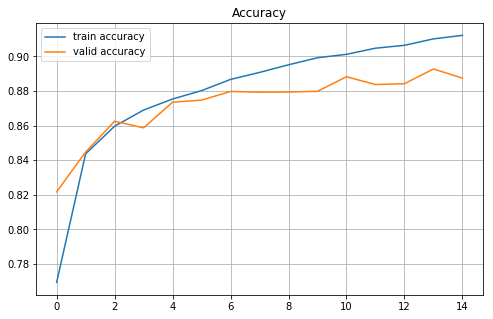

In [168]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

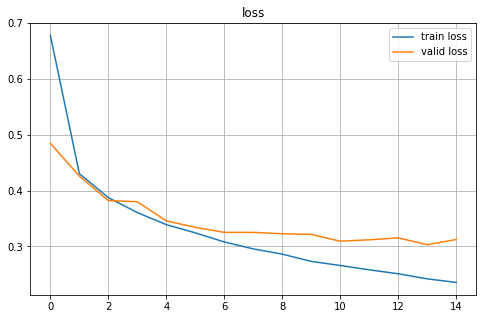

In [169]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [170]:
scores = model1.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 0.3369 - accuracy: 0.8814 - 663ms/epoch - 2ms/step
 accuracy: 88.14%


**As we can see there is  overffiting in our model. So I added 2 dropout Layers to the model with 2 different atchsize**

In [201]:
model2 = keras.models.Sequential([
                        
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dropout(.2),
                          keras.layers.Dense(256, activation="relu"),
                          keras.layers.Dropout(.2),
                          keras.layers.Dense(10, activation="sigmoid")
                                     ])
    
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

**Batch size 128:**

In [202]:
history = model2.fit(X_train, Y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, Y_valid))

Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 0.7582 - accuracy: 0.7258 - val_loss: 0.4863 - val_accuracy: 0.8186
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.8352 - val_loss: 0.4098 - val_accuracy: 0.8470
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8521 - val_loss: 0.3778 - val_accuracy: 0.8633
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8609 - val_loss: 0.3588 - val_accuracy: 0.8665
Epoch 5/15
391/391 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8687 - val_loss: 0.3537 - val_accuracy: 0.8668
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8741 - val_loss: 0.3403 - val_accuracy: 0.8775
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8772 - val_loss: 0.3262 - val_accuracy: 0.8807
Epoch 

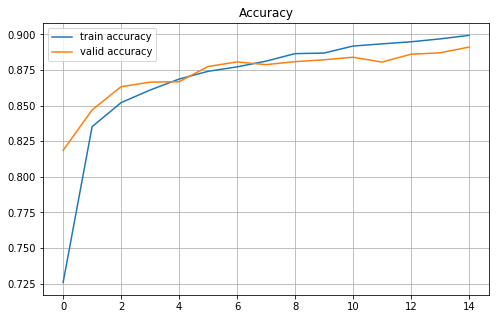

In [203]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)


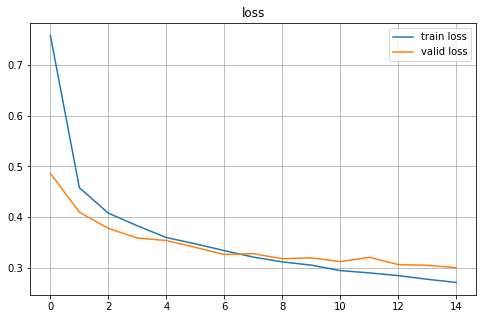

In [204]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [205]:
scores = model2.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

313/313 - 0s - loss: 0.3232 - accuracy: 0.8841 - 336ms/epoch - 1ms/step
 accuracy: 88.41%


**Batchsize 256:**

In [186]:
history = model2.fit(X_train, Y_train, epochs=15, batch_size=256,
                  validation_data=(X_valid, Y_valid))

Epoch 1/15
196/196 [==============================] - 6s 26ms/step - loss: 0.9081 - accuracy: 0.6795 - val_loss: 0.5226 - val_accuracy: 0.8130
Epoch 2/15
196/196 [==============================] - 2s 10ms/step - loss: 0.5050 - accuracy: 0.8168 - val_loss: 0.4434 - val_accuracy: 0.8398
Epoch 3/15
196/196 [==============================] - 3s 16ms/step - loss: 0.4459 - accuracy: 0.8387 - val_loss: 0.4054 - val_accuracy: 0.8507
Epoch 4/15
196/196 [==============================] - 3s 16ms/step - loss: 0.4099 - accuracy: 0.8530 - val_loss: 0.3884 - val_accuracy: 0.8582
Epoch 5/15
196/196 [==============================] - 4s 19ms/step - loss: 0.3868 - accuracy: 0.8590 - val_loss: 0.3727 - val_accuracy: 0.8645
Epoch 6/15
196/196 [==============================] - 2s 13ms/step - loss: 0.3727 - accuracy: 0.8661 - val_loss: 0.3519 - val_accuracy: 0.8707
Epoch 7/15
196/196 [==============================] - 1s 7ms/step - loss: 0.3559 - accuracy: 0.8717 - val_loss: 0.3463 - val_accuracy: 0.8719


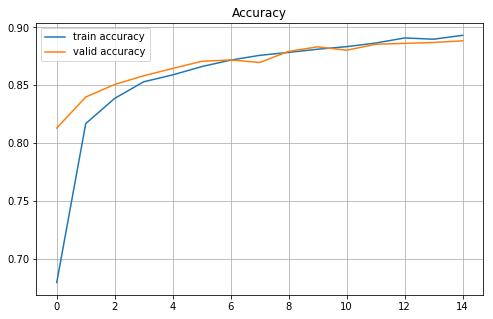

In [187]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

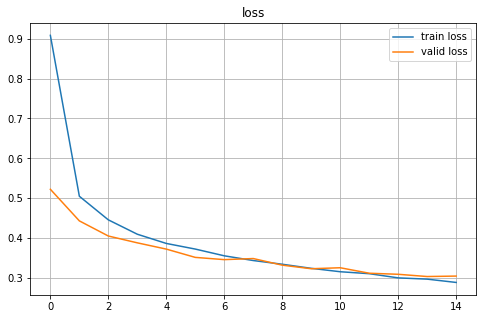

In [188]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [189]:
scores = model2.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 0.3309 - accuracy: 0.8796 - 646ms/epoch - 2ms/step
 accuracy: 87.96%


**As we can see the accuracy decreased less than 0.5 percent but looking at loss and accuracy plots of train and validation we can say batchsize 256 is a better choice**

In [221]:
predict_x=model2.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [222]:
print(classification_report(Y_test, classes_x))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.77      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.75      0.85      0.80      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## CNN 
**Out of curiosity**

In [207]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_valid = X_valid.reshape(X_valid.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


### Grid search for number of units

In [27]:
def build_model(n_units1=32,n_units2=16):
    model = keras.models.Sequential([
    keras.layers.Conv2D(filters=n_units1, kernel_size=[3,3], activation= 'relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=n_units2, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
    ])
  
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])
    return model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Arghavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [28]:
param_distribs = {
    "n_units1": [16, 32, 64,256],
    "n_units2": [16, 32, 64,256],
    
}

In [30]:
grid_search.fit(X_train, Y_train, epochs=5,batch_size=128,
                validation_data=(X_valid, Y_valid))


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)
C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 9s 32ms/step - loss: 0.9395 - accuracy: 0.7023 - val_loss: 0.5802 - val_accuracy: 0.7873
Epoch 2/5
261/261 [==============================] - 8s 31ms/step - loss: 0.5351 - accuracy: 0.8009 - val_loss: 0.5052 - val_accuracy: 0.8174
Epoch 3/5
261/261 [==============================] - 8s 30ms/step - loss: 0.4818 - accuracy: 0.8240 - val_loss: 0.4794 - val_accuracy: 0.8256
Epoch 4/5
261/261 [==============================] - 8s 29ms/step - loss: 0.4472 - accuracy: 0.8395 - val_loss: 0.4441 - val_accuracy: 0.8409
Epoch 5/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4195 - accuracy: 0.8494


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 9s 32ms/step - loss: 0.9521 - accuracy: 0.6874 - val_loss: 0.6003 - val_accuracy: 0.7822
Epoch 2/5
261/261 [==============================] - 8s 31ms/step - loss: 0.5589 - accuracy: 0.7936 - val_loss: 0.5338 - val_accuracy: 0.8048
Epoch 3/5
261/261 [==============================] - 8s 31ms/step - loss: 0.5118 - accuracy: 0.8115 - val_loss: 0.4930 - val_accuracy: 0.8245
Epoch 4/5
261/261 [==============================] - 8s 31ms/step - loss: 0.4794 - accuracy: 0.8229 - val_loss: 0.4714 - val_accuracy: 0.8282
Epoch 5/5
1042/1042 [==============================] - 7s 6ms/step - loss: 0.4314 - accuracy: 0.8472


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 9s 32ms/step - loss: 0.9175 - accuracy: 0.6984 - val_loss: 0.5868 - val_accuracy: 0.7846
Epoch 2/5
261/261 [==============================] - 8s 31ms/step - loss: 0.5531 - accuracy: 0.7985 - val_loss: 0.5158 - val_accuracy: 0.8127
Epoch 3/5
261/261 [==============================] - 8s 30ms/step - loss: 0.4996 - accuracy: 0.8181 - val_loss: 0.4896 - val_accuracy: 0.8183
Epoch 4/5
261/261 [==============================] - 8s 29ms/step - loss: 0.4637 - accuracy: 0.8322 - val_loss: 0.4621 - val_accuracy: 0.8348
Epoch 5/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4287 - accuracy: 0.8425


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 9s 32ms/step - loss: 0.8603 - accuracy: 0.7086 - val_loss: 0.5739 - val_accuracy: 0.7820
Epoch 2/5
261/261 [==============================] - 8s 31ms/step - loss: 0.5302 - accuracy: 0.8043 - val_loss: 0.5007 - val_accuracy: 0.820709 - accuracy: 0.
Epoch 3/5
261/261 [==============================] - 8s 31ms/step - loss: 0.4798 - accuracy: 0.8249 - val_loss: 0.4566 - val_accuracy: 0.8376
Epoch 4/5
261/261 [==============================] - 8s 31ms/step - loss: 0.4419 - accuracy: 0.8409 - val_loss: 0.4437 - val_accuracy: 0.8382
Epoch 5/5
1042/1042 [==============================] - 6s 6ms/step - loss: 0.4053 - accuracy: 0.8551


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 9s 34ms/step - loss: 0.8473 - accuracy: 0.7079 - val_loss: 0.5674 - val_accuracy: 0.7916
Epoch 2/5
261/261 [==============================] - 8s 33ms/step - loss: 0.5171 - accuracy: 0.8080 - val_loss: 0.4835 - val_accuracy: 0.8257
Epoch 3/5
261/261 [==============================] - 8s 32ms/step - loss: 0.4697 - accuracy: 0.8282 - val_loss: 0.4586 - val_accuracy: 0.8363
Epoch 4/5
261/261 [==============================] - 8s 32ms/step - loss: 0.4410 - accuracy: 0.8399 - val_loss: 0.4432 - val_accuracy: 0.8374
Epoch 5/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.4060 - accuracy: 0.8536


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 11s 38ms/step - loss: 0.8801 - accuracy: 0.7118 - val_loss: 0.5586 - val_accuracy: 0.7903
Epoch 2/5
261/261 [==============================] - 10s 37ms/step - loss: 0.5068 - accuracy: 0.8151 - val_loss: 0.4683 - val_accuracy: 0.8293
Epoch 3/5
261/261 [==============================] - 10s 37ms/step - loss: 0.4514 - accuracy: 0.8377 - val_loss: 0.4544 - val_accuracy: 0.8300
Epoch 4/5
261/261 [==============================] - 10s 37ms/step - loss: 0.4261 - accuracy: 0.8455 - val_loss: 0.4252 - val_accuracy: 0.8459
Epoch 5/5
1042/1042 [==============================] - 10s 10ms/step - loss: 0.3904 - accuracy: 0.8614


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 12s 43ms/step - loss: 0.7768 - accuracy: 0.7345 - val_loss: 0.5293 - val_accuracy: 0.8054
Epoch 2/5
261/261 [==============================] - 11s 42ms/step - loss: 0.4898 - accuracy: 0.8201 - val_loss: 0.4686 - val_accuracy: 0.8331
Epoch 3/5
261/261 [==============================] - 11s 42ms/step - loss: 0.4444 - accuracy: 0.8391 - val_loss: 0.4308 - val_accuracy: 0.8469
Epoch 4/5
261/261 [==============================] - 11s 43ms/step - loss: 0.4114 - accuracy: 0.8532 - val_loss: 0.4124 - val_accuracy: 0.8538
Epoch 5/5
1042/1042 [==============================] - 9s 8ms/step - loss: 0.3742 - accuracy: 0.8679


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 12s 44ms/step - loss: 0.8030 - accuracy: 0.7228 - val_loss: 0.5546 - val_accuracy: 0.7931
Epoch 2/5
261/261 [==============================] - 11s 42ms/step - loss: 0.5160 - accuracy: 0.8082 - val_loss: 0.4865 - val_accuracy: 0.8205
Epoch 3/5
261/261 [==============================] - 11s 42ms/step - loss: 0.4636 - accuracy: 0.8304 - val_loss: 0.4468 - val_accuracy: 0.8410
Epoch 4/5
261/261 [==============================] - 11s 42ms/step - loss: 0.4294 - accuracy: 0.8445 - val_loss: 0.4380 - val_accuracy: 0.8488
Epoch 5/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.3904 - accuracy: 0.8586


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 13s 47ms/step - loss: 0.8056 - accuracy: 0.7189 - val_loss: 0.5510 - val_accuracy: 0.8018
Epoch 2/5
261/261 [==============================] - 12s 45ms/step - loss: 0.5103 - accuracy: 0.8124 - val_loss: 0.4743 - val_accuracy: 0.8288
Epoch 3/5
261/261 [==============================] - 12s 45ms/step - loss: 0.4512 - accuracy: 0.8398 - val_loss: 0.4329 - val_accuracy: 0.8461
Epoch 4/5
261/261 [==============================] - 12s 45ms/step - loss: 0.4167 - accuracy: 0.8504 - val_loss: 0.4202 - val_accuracy: 0.8506
Epoch 5/5
1042/1042 [==============================] - 13s 13ms/step - loss: 0.3724 - accuracy: 0.86910s - loss: 0.3720 - accura


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 22s 81ms/step - loss: 0.7005 - accuracy: 0.7538 - val_loss: 0.4874 - val_accuracy: 0.8216
Epoch 2/5
261/261 [==============================] - 21s 80ms/step - loss: 0.4507 - accuracy: 0.8360 - val_loss: 0.4357 - val_accuracy: 0.8456
Epoch 3/5
261/261 [==============================] - 21s 82ms/step - loss: 0.4047 - accuracy: 0.8552 - val_loss: 0.4020 - val_accuracy: 0.8623
Epoch 4/5
261/261 [==============================] - 21s 80ms/step - loss: 0.3766 - accuracy: 0.8672 - val_loss: 0.3892 - val_accuracy: 0.8649
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.3389 - accuracy: 0.8801


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 22s 81ms/step - loss: 0.7046 - accuracy: 0.7496 - val_loss: 0.4937 - val_accuracy: 0.8211
Epoch 2/5
261/261 [==============================] - 21s 80ms/step - loss: 0.4480 - accuracy: 0.8376 - val_loss: 0.4329 - val_accuracy: 0.8457
Epoch 3/5
261/261 [==============================] - 21s 80ms/step - loss: 0.3995 - accuracy: 0.8572 - val_loss: 0.3864 - val_accuracy: 0.8665
Epoch 4/5
261/261 [==============================] - 21s 79ms/step - loss: 0.3739 - accuracy: 0.8672 - val_loss: 0.3763 - val_accuracy: 0.8672
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.3411 - accuracy: 0.8779


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 21s 77ms/step - loss: 0.6909 - accuracy: 0.7584 - val_loss: 0.4925 - val_accuracy: 0.8153
Epoch 2/5
261/261 [==============================] - 20s 77ms/step - loss: 0.4410 - accuracy: 0.8422 - val_loss: 0.4339 - val_accuracy: 0.8437
Epoch 3/5
261/261 [==============================] - 20s 76ms/step - loss: 0.3943 - accuracy: 0.8604 - val_loss: 0.4014 - val_accuracy: 0.8594
Epoch 4/5
261/261 [==============================] - 20s 76ms/step - loss: 0.3652 - accuracy: 0.8709 - val_loss: 0.3731 - val_accuracy: 0.8711
Epoch 5/5
1042/1042 [==============================] - 11s 10ms/step - loss: 0.3280 - accuracy: 0.8830


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 51ms/step - loss: 0.8785 - accuracy: 0.7087 - val_loss: 0.5795 - val_accuracy: 0.7849
Epoch 2/5
261/261 [==============================] - 13s 50ms/step - loss: 0.5454 - accuracy: 0.7969 - val_loss: 0.5283 - val_accuracy: 0.8029
Epoch 3/5
261/261 [==============================] - 13s 50ms/step - loss: 0.4950 - accuracy: 0.8168 - val_loss: 0.4959 - val_accuracy: 0.8156
Epoch 4/5
261/261 [==============================] - 13s 50ms/step - loss: 0.4640 - accuracy: 0.8300 - val_loss: 0.4688 - val_accuracy: 0.8284
Epoch 5/5
1042/1042 [==============================] - 10s 10ms/step - loss: 0.4191 - accuracy: 0.8473


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 50ms/step - loss: 0.9094 - accuracy: 0.7028 - val_loss: 0.5845 - val_accuracy: 0.7862
Epoch 2/5
261/261 [==============================] - 13s 49ms/step - loss: 0.5479 - accuracy: 0.7938 - val_loss: 0.5163 - val_accuracy: 0.8120oss: 0.551 - ETA: 1s -
Epoch 3/5
261/261 [==============================] - 13s 49ms/step - loss: 0.4982 - accuracy: 0.8141 - val_loss: 0.4743 - val_accuracy: 0.8287
Epoch 4/5
261/261 [==============================] - 13s 49ms/step - loss: 0.4582 - accuracy: 0.8295 - val_loss: 0.4483 - val_accuracy: 0.8360
Epoch 5/5
1042/1042 [==============================] - 9s 9ms/step - loss: 0.4146 - accuracy: 0.8512


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 50ms/step - loss: 0.8857 - accuracy: 0.7039 - val_loss: 0.5834 - val_accuracy: 0.7741
Epoch 2/5
261/261 [==============================] - 13s 48ms/step - loss: 0.5546 - accuracy: 0.7963 - val_loss: 0.5181 - val_accuracy: 0.8164
Epoch 3/5
261/261 [==============================] - 13s 48ms/step - loss: 0.5084 - accuracy: 0.8147 - val_loss: 0.4945 - val_accuracy: 0.8226
Epoch 4/5
261/261 [==============================] - 13s 49ms/step - loss: 0.4823 - accuracy: 0.8253 - val_loss: 0.4713 - val_accuracy: 0.8305
Epoch 5/5
1042/1042 [==============================] - 10s 9ms/step - loss: 0.4468 - accuracy: 0.8368


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 52ms/step - loss: 0.8491 - accuracy: 0.7058 - val_loss: 0.5534 - val_accuracy: 0.7902
Epoch 2/5
261/261 [==============================] - 13s 51ms/step - loss: 0.5067 - accuracy: 0.8132 - val_loss: 0.4704 - val_accuracy: 0.8279
Epoch 3/5
261/261 [==============================] - 13s 51ms/step - loss: 0.4530 - accuracy: 0.8383 - val_loss: 0.4446 - val_accuracy: 0.8419
Epoch 4/5
261/261 [==============================] - 13s 51ms/step - loss: 0.4236 - accuracy: 0.8481 - val_loss: 0.4203 - val_accuracy: 0.8533
Epoch 5/5
1042/1042 [==============================] - 10s 9ms/step - loss: 0.3958 - accuracy: 0.8603


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 53ms/step - loss: 0.8416 - accuracy: 0.7056 - val_loss: 0.5507 - val_accuracy: 0.7984
Epoch 2/5
261/261 [==============================] - 13s 51ms/step - loss: 0.5153 - accuracy: 0.8069 - val_loss: 0.5083 - val_accuracy: 0.8052
Epoch 3/5
261/261 [==============================] - 13s 51ms/step - loss: 0.4613 - accuracy: 0.8310 - val_loss: 0.4567 - val_accuracy: 0.8354
Epoch 4/5
261/261 [==============================] - 13s 52ms/step - loss: 0.4266 - accuracy: 0.8448 - val_loss: 0.4369 - val_accuracy: 0.8469
Epoch 5/5
1042/1042 [==============================] - 9s 8ms/step - loss: 0.4170 - accuracy: 0.8485


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 14s 52ms/step - loss: 0.8200 - accuracy: 0.7137 - val_loss: 0.5507 - val_accuracy: 0.7982
Epoch 2/5
261/261 [==============================] - 13s 51ms/step - loss: 0.5269 - accuracy: 0.8054 - val_loss: 0.4914 - val_accuracy: 0.8216
Epoch 3/5
261/261 [==============================] - 13s 51ms/step - loss: 0.4690 - accuracy: 0.8299 - val_loss: 0.4490 - val_accuracy: 0.8384
Epoch 4/5
261/261 [==============================] - 14s 52ms/step - loss: 0.4349 - accuracy: 0.8433 - val_loss: 0.4360 - val_accuracy: 0.8446
Epoch 5/5
1042/1042 [==============================] - 9s 9ms/step - loss: 0.3963 - accuracy: 0.8586


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 18s 65ms/step - loss: 0.7907 - accuracy: 0.7255 - val_loss: 0.5478 - val_accuracy: 0.7961
Epoch 2/5
261/261 [==============================] - 16s 63ms/step - loss: 0.4966 - accuracy: 0.8191 - val_loss: 0.4751 - val_accuracy: 0.8314
Epoch 3/5
261/261 [==============================] - 16s 63ms/step - loss: 0.4410 - accuracy: 0.8412 - val_loss: 0.4274 - val_accuracy: 0.8490
Epoch 4/5
261/261 [==============================] - 16s 62ms/step - loss: 0.4085 - accuracy: 0.8556 - val_loss: 0.3991 - val_accuracy: 0.8618
Epoch 5/5
1042/1042 [==============================] - 9s 9ms/step - loss: 0.3733 - accuracy: 0.8669


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 16s 58ms/step - loss: 0.7785 - accuracy: 0.7277 - val_loss: 0.5079 - val_accuracy: 0.8180
Epoch 2/5
261/261 [==============================] - 14s 55ms/step - loss: 0.4840 - accuracy: 0.8206 - val_loss: 0.4489 - val_accuracy: 0.8380
Epoch 3/5
261/261 [==============================] - 14s 54ms/step - loss: 0.4258 - accuracy: 0.8473 - val_loss: 0.4173 - val_accuracy: 0.8559
Epoch 4/5
261/261 [==============================] - 15s 56ms/step - loss: 0.3970 - accuracy: 0.8569 - val_loss: 0.4013 - val_accuracy: 0.8594
Epoch 5/5
1042/1042 [==============================] - 8s 7ms/step - loss: 0.3651 - accuracy: 0.8685


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 16s 58ms/step - loss: 0.7639 - accuracy: 0.7366 - val_loss: 0.5291 - val_accuracy: 0.8035
Epoch 2/5
261/261 [==============================] - 15s 57ms/step - loss: 0.4801 - accuracy: 0.8235 - val_loss: 0.4495 - val_accuracy: 0.8405
Epoch 3/5
261/261 [==============================] - 15s 56ms/step - loss: 0.4289 - accuracy: 0.8466 - val_loss: 0.4307 - val_accuracy: 0.8447
Epoch 4/5
261/261 [==============================] - 15s 57ms/step - loss: 0.4006 - accuracy: 0.8574 - val_loss: 0.3905 - val_accuracy: 0.8657
Epoch 5/5
1042/1042 [==============================] - 8s 8ms/step - loss: 0.3637 - accuracy: 0.8738


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 26s 97ms/step - loss: 0.6684 - accuracy: 0.7623 - val_loss: 0.4761 - val_accuracy: 0.8364
Epoch 2/5
261/261 [==============================] - 25s 96ms/step - loss: 0.4301 - accuracy: 0.8462 - val_loss: 0.4056 - val_accuracy: 0.8573
Epoch 3/5
261/261 [==============================] - 25s 96ms/step - loss: 0.3885 - accuracy: 0.8632 - val_loss: 0.3853 - val_accuracy: 0.8662
Epoch 4/5
261/261 [==============================] - 25s 97ms/step - loss: 0.3620 - accuracy: 0.8729 - val_loss: 0.3722 - val_accuracy: 0.8728
Epoch 5/5
1042/1042 [==============================] - 12s 11ms/step - loss: 0.3167 - accuracy: 0.8890


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 25s 95ms/step - loss: 0.6722 - accuracy: 0.7615 - val_loss: 0.4567 - val_accuracy: 0.8366
Epoch 2/5
261/261 [==============================] - 24s 93ms/step - loss: 0.4247 - accuracy: 0.8469 - val_loss: 0.3988 - val_accuracy: 0.8626
Epoch 3/5
261/261 [==============================] - 25s 94ms/step - loss: 0.3864 - accuracy: 0.8633 - val_loss: 0.3836 - val_accuracy: 0.8677
Epoch 4/5
261/261 [==============================] - 24s 94ms/step - loss: 0.3541 - accuracy: 0.8750 - val_loss: 0.3685 - val_accuracy: 0.8696
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.3213 - accuracy: 0.8832


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 26s 97ms/step - loss: 0.6871 - accuracy: 0.7565 - val_loss: 0.4780 - val_accuracy: 0.8291
Epoch 2/5
261/261 [==============================] - 26s 100ms/step - loss: 0.4424 - accuracy: 0.8421 - val_loss: 0.4434 - val_accuracy: 0.8427
Epoch 3/5
261/261 [==============================] - 26s 101ms/step - loss: 0.3947 - accuracy: 0.8603 - val_loss: 0.4287 - val_accuracy: 0.8447
Epoch 4/5
261/261 [==============================] - 26s 101ms/step - loss: 0.3667 - accuracy: 0.8709 - val_loss: 0.3848 - val_accuracy: 0.8675
Epoch 5/5
1042/1042 [==============================] - 12s 12ms/step - loss: 0.3265 - accuracy: 0.8849


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 23s 84ms/step - loss: 0.8597 - accuracy: 0.7053 - val_loss: 0.5776 - val_accuracy: 0.7929
Epoch 2/5
261/261 [==============================] - 22s 83ms/step - loss: 0.5428 - accuracy: 0.7999 - val_loss: 0.5284 - val_accuracy: 0.8094
Epoch 3/5
261/261 [==============================] - 22s 83ms/step - loss: 0.4973 - accuracy: 0.8154 - val_loss: 0.4887 - val_accuracy: 0.8270
Epoch 4/5
261/261 [==============================] - 22s 83ms/step - loss: 0.4622 - accuracy: 0.8325 - val_loss: 0.4540 - val_accuracy: 0.8383
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.4223 - accuracy: 0.8476


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 23s 84ms/step - loss: 0.8673 - accuracy: 0.6970 - val_loss: 0.5652 - val_accuracy: 0.7903
Epoch 2/5
261/261 [==============================] - 22s 84ms/step - loss: 0.5337 - accuracy: 0.8005 - val_loss: 0.4995 - val_accuracy: 0.8190
Epoch 3/5
261/261 [==============================] - 23s 88ms/step - loss: 0.4853 - accuracy: 0.8213 - val_loss: 0.4745 - val_accuracy: 0.8223
Epoch 4/5
261/261 [==============================] - 22s 83ms/step - loss: 0.4485 - accuracy: 0.8384 - val_loss: 0.4640 - val_accuracy: 0.8261
Epoch 5/5
1042/1042 [==============================] - 11s 10ms/step - loss: 0.4266 - accuracy: 0.8439


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 22s 83ms/step - loss: 0.8878 - accuracy: 0.6949 - val_loss: 0.5763 - val_accuracy: 0.7837
Epoch 2/5
261/261 [==============================] - 21s 82ms/step - loss: 0.5449 - accuracy: 0.8003 - val_loss: 0.5472 - val_accuracy: 0.8058
Epoch 3/5
261/261 [==============================] - 21s 82ms/step - loss: 0.4960 - accuracy: 0.8210 - val_loss: 0.4897 - val_accuracy: 0.8229
Epoch 4/5
261/261 [==============================] - 22s 83ms/step - loss: 0.4645 - accuracy: 0.8313 - val_loss: 0.4529 - val_accuracy: 0.8393
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.4167 - accuracy: 0.8529


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 23s 87ms/step - loss: 0.8093 - accuracy: 0.7274 - val_loss: 0.5514 - val_accuracy: 0.8029
Epoch 2/5
261/261 [==============================] - 22s 86ms/step - loss: 0.5077 - accuracy: 0.8137 - val_loss: 0.4790 - val_accuracy: 0.8267
Epoch 3/5
261/261 [==============================] - 22s 86ms/step - loss: 0.4519 - accuracy: 0.8355 - val_loss: 0.4454 - val_accuracy: 0.8355
Epoch 4/5
261/261 [==============================] - 23s 86ms/step - loss: 0.4183 - accuracy: 0.8503 - val_loss: 0.4166 - val_accuracy: 0.8536
Epoch 5/5
1042/1042 [==============================] - 10s 10ms/step - loss: 0.3892 - accuracy: 0.8628


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 24s 86ms/step - loss: 0.8060 - accuracy: 0.7203 - val_loss: 0.5510 - val_accuracy: 0.7866
Epoch 2/5
261/261 [==============================] - 23s 87ms/step - loss: 0.5090 - accuracy: 0.8096 - val_loss: 0.5087 - val_accuracy: 0.8143
Epoch 3/5
261/261 [==============================] - 23s 87ms/step - loss: 0.4567 - accuracy: 0.8340 - val_loss: 0.4269 - val_accuracy: 0.8499
Epoch 4/5
261/261 [==============================] - 23s 87ms/step - loss: 0.4210 - accuracy: 0.8478 - val_loss: 0.4111 - val_accuracy: 0.8587
Epoch 5/5
1042/1042 [==============================] - 12s 11ms/step - loss: 0.3968 - accuracy: 0.8552


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 24s 88ms/step - loss: 0.8019 - accuracy: 0.7253 - val_loss: 0.5254 - val_accuracy: 0.8061
Epoch 2/5
261/261 [==============================] - 23s 89ms/step - loss: 0.4974 - accuracy: 0.8184 - val_loss: 0.4670 - val_accuracy: 0.8297
Epoch 3/5
261/261 [==============================] - 23s 89ms/step - loss: 0.4424 - accuracy: 0.8415 - val_loss: 0.4369 - val_accuracy: 0.8451
Epoch 4/5
261/261 [==============================] - 23s 89ms/step - loss: 0.4095 - accuracy: 0.8553 - val_loss: 0.4126 - val_accuracy: 0.8591
Epoch 5/5
1042/1042 [==============================] - 12s 12ms/step - loss: 0.3947 - accuracy: 0.8614


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 26s 96ms/step - loss: 0.7519 - accuracy: 0.7362 - val_loss: 0.5529 - val_accuracy: 0.7923
Epoch 2/5
261/261 [==============================] - 25s 96ms/step - loss: 0.4843 - accuracy: 0.8249 - val_loss: 0.4846 - val_accuracy: 0.8220
Epoch 3/5
261/261 [==============================] - 26s 98ms/step - loss: 0.4275 - accuracy: 0.8460 - val_loss: 0.4188 - val_accuracy: 0.8552
Epoch 4/5
261/261 [==============================] - 26s 98ms/step - loss: 0.3913 - accuracy: 0.8607 - val_loss: 0.4005 - val_accuracy: 0.8611
Epoch 5/5
1042/1042 [==============================] - 14s 13ms/step - loss: 0.3727 - accuracy: 0.8700


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 26s 96ms/step - loss: 0.7487 - accuracy: 0.7307 - val_loss: 0.5097 - val_accuracy: 0.8083
Epoch 2/5
261/261 [==============================] - 25s 95ms/step - loss: 0.4793 - accuracy: 0.8227 - val_loss: 0.4401 - val_accuracy: 0.8437
Epoch 3/5
261/261 [==============================] - 25s 95ms/step - loss: 0.4222 - accuracy: 0.8473 - val_loss: 0.4408 - val_accuracy: 0.8429
Epoch 4/5
261/261 [==============================] - 25s 95ms/step - loss: 0.3936 - accuracy: 0.8589 - val_loss: 0.4097 - val_accuracy: 0.8580
Epoch 5/5
1042/1042 [==============================] - 11s 11ms/step - loss: 0.3635 - accuracy: 0.8685


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 26s 96ms/step - loss: 0.7474 - accuracy: 0.7408 - val_loss: 0.5210 - val_accuracy: 0.8049
Epoch 2/5
261/261 [==============================] - 25s 96ms/step - loss: 0.4704 - accuracy: 0.8301 - val_loss: 0.4575 - val_accuracy: 0.8311
Epoch 3/5
261/261 [==============================] - 24s 92ms/step - loss: 0.4189 - accuracy: 0.8515 - val_loss: 0.4315 - val_accuracy: 0.8523
Epoch 4/5
261/261 [==============================] - 24s 91ms/step - loss: 0.3907 - accuracy: 0.8622 - val_loss: 0.3885 - val_accuracy: 0.8640
Epoch 5/5
1042/1042 [==============================] - 12s 11ms/step - loss: 0.3699 - accuracy: 0.8676


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 39s 147ms/step - loss: 0.6573 - accuracy: 0.7650 - val_loss: 0.4831 - val_accuracy: 0.8252
Epoch 2/5
261/261 [==============================] - 38s 145ms/step - loss: 0.4321 - accuracy: 0.8447 - val_loss: 0.4100 - val_accuracy: 0.8587
Epoch 3/5
261/261 [==============================] - 38s 145ms/step - loss: 0.3868 - accuracy: 0.8642 - val_loss: 0.3764 - val_accuracy: 0.8686
Epoch 4/5
261/261 [==============================] - 38s 146ms/step - loss: 0.3577 - accuracy: 0.8737 - val_loss: 0.3583 - val_accuracy: 0.8759
Epoch 5/5
1042/1042 [==============================] - 16s 15ms/step - loss: 0.3124 - accuracy: 0.8887 ETA: 3s - l - - ETA: 0s


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 38s 145ms/step - loss: 0.6816 - accuracy: 0.7524 - val_loss: 0.4705 - val_accuracy: 0.8343
Epoch 2/5
261/261 [==============================] - 37s 143ms/step - loss: 0.4353 - accuracy: 0.8441 - val_loss: 0.4348 - val_accuracy: 0.8460
Epoch 3/5
261/261 [==============================] - 38s 145ms/step - loss: 0.3851 - accuracy: 0.8615 - val_loss: 0.3792 - val_accuracy: 0.8672
Epoch 4/5
261/261 [==============================] - 38s 145ms/step - loss: 0.3581 - accuracy: 0.8711 - val_loss: 0.3950 - val_accuracy: 0.8628
Epoch 5/5
1042/1042 [==============================] - 15s 15ms/step - loss: 0.3300 - accuracy: 0.8794


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 38s 144ms/step - loss: 0.6636 - accuracy: 0.7626 - val_loss: 0.4677 - val_accuracy: 0.8339
Epoch 2/5
261/261 [==============================] - 37s 143ms/step - loss: 0.4206 - accuracy: 0.8479 - val_loss: 0.3939 - val_accuracy: 0.8615
Epoch 3/5
261/261 [==============================] - 37s 143ms/step - loss: 0.3788 - accuracy: 0.8668 - val_loss: 0.3844 - val_accuracy: 0.8636
Epoch 4/5
261/261 [==============================] - 37s 143ms/step - loss: 0.3547 - accuracy: 0.8754 - val_loss: 0.3598 - val_accuracy: 0.8743
Epoch 5/5
1042/1042 [==============================] - 15s 15ms/step - loss: 0.3106 - accuracy: 0.8890


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 67s 254ms/step - loss: 0.8080 - accuracy: 0.7206 - val_loss: 0.5503 - val_accuracy: 0.7978
Epoch 2/5
261/261 [==============================] - 66s 253ms/step - loss: 0.5160 - accuracy: 0.8096 - val_loss: 0.4828 - val_accuracy: 0.8241
Epoch 3/5
261/261 [==============================] - 67s 256ms/step - loss: 0.4653 - accuracy: 0.8322 - val_loss: 0.4538 - val_accuracy: 0.8368
Epoch 4/5
261/261 [==============================] - 66s 254ms/step - loss: 0.4260 - accuracy: 0.8489 - val_loss: 0.4170 - val_accuracy: 0.8519
Epoch 5/5
1042/1042 [==============================] - 21s 20ms/step - loss: 0.3830 - accuracy: 0.8654


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 67s 253ms/step - loss: 0.8389 - accuracy: 0.7037 - val_loss: 0.5704 - val_accuracy: 0.7829
Epoch 2/5
261/261 [==============================] - 66s 253ms/step - loss: 0.5372 - accuracy: 0.8018 - val_loss: 0.4977 - val_accuracy: 0.8196
Epoch 3/5
261/261 [==============================] - 66s 252ms/step - loss: 0.4889 - accuracy: 0.8207 - val_loss: 0.4692 - val_accuracy: 0.8354
Epoch 4/5
261/261 [==============================] - 67s 257ms/step - loss: 0.4502 - accuracy: 0.8364 - val_loss: 0.4482 - val_accuracy: 0.8357
Epoch 5/5
1042/1042 [==============================] - 22s 21ms/step - loss: 0.4002 - accuracy: 0.8591


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 68s 257ms/step - loss: 0.8330 - accuracy: 0.7190 - val_loss: 0.5713 - val_accuracy: 0.7907
Epoch 2/5
261/261 [==============================] - 67s 258ms/step - loss: 0.5393 - accuracy: 0.8030 - val_loss: 0.5051 - val_accuracy: 0.8118
Epoch 3/5
261/261 [==============================] - 67s 258ms/step - loss: 0.4799 - accuracy: 0.8253 - val_loss: 0.4558 - val_accuracy: 0.8401
Epoch 4/5
261/261 [==============================] - 68s 260ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4244 - val_accuracy: 0.8479
Epoch 5/5
1042/1042 [==============================] - 22s 21ms/step - loss: 0.3868 - accuracy: 0.8629


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 71s 270ms/step - loss: 0.7545 - accuracy: 0.7339 - val_loss: 0.5355 - val_accuracy: 0.7935
Epoch 2/5
261/261 [==============================] - 70s 269ms/step - loss: 0.4824 - accuracy: 0.8220 - val_loss: 0.4499 - val_accuracy: 0.8429
Epoch 3/5
261/261 [==============================] - 71s 270ms/step - loss: 0.4255 - accuracy: 0.8491 - val_loss: 0.4372 - val_accuracy: 0.8390
Epoch 4/5
261/261 [==============================] - 70s 269ms/step - loss: 0.3920 - accuracy: 0.8615 - val_loss: 0.3986 - val_accuracy: 0.8635
Epoch 5/5
1042/1042 [==============================] - 22s 21ms/step - loss: 0.3523 - accuracy: 0.8765


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 71s 270ms/step - loss: 0.7613 - accuracy: 0.7349 - val_loss: 0.5530 - val_accuracy: 0.8004
Epoch 2/5
261/261 [==============================] - 70s 269ms/step - loss: 0.4992 - accuracy: 0.8148 - val_loss: 0.4888 - val_accuracy: 0.8273
Epoch 3/5
261/261 [==============================] - 71s 271ms/step - loss: 0.4420 - accuracy: 0.8396 - val_loss: 0.4172 - val_accuracy: 0.8538
Epoch 4/5
261/261 [==============================] - 70s 269ms/step - loss: 0.4063 - accuracy: 0.8562 - val_loss: 0.3961 - val_accuracy: 0.8622
Epoch 5/5
1042/1042 [==============================] - 22s 21ms/step - loss: 0.3725 - accuracy: 0.8666


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 70s 266ms/step - loss: 0.7571 - accuracy: 0.7345 - val_loss: 0.5540 - val_accuracy: 0.7935
Epoch 2/5
261/261 [==============================] - 45s 174ms/step - loss: 0.4811 - accuracy: 0.8236 - val_loss: 0.4461 - val_accuracy: 0.8423
Epoch 3/5
261/261 [==============================] - 45s 171ms/step - loss: 0.4218 - accuracy: 0.8481 - val_loss: 0.4202 - val_accuracy: 0.8498
Epoch 4/5
261/261 [==============================] - 45s 174ms/step - loss: 0.3899 - accuracy: 0.8630 - val_loss: 0.4090 - val_accuracy: 0.8539
Epoch 5/5
1042/1042 [==============================] - 13s 13ms/step - loss: 0.3533 - accuracy: 0.8760


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 55s 208ms/step - loss: 0.7154 - accuracy: 0.7427 - val_loss: 0.5146 - val_accuracy: 0.8104
Epoch 2/5
261/261 [==============================] - 58s 221ms/step - loss: 0.4601 - accuracy: 0.8325 - val_loss: 0.4402 - val_accuracy: 0.8461
Epoch 3/5
261/261 [==============================] - 54s 208ms/step - loss: 0.4075 - accuracy: 0.8564 - val_loss: 0.4030 - val_accuracy: 0.8590
Epoch 4/5
261/261 [==============================] - 54s 207ms/step - loss: 0.3762 - accuracy: 0.8669 - val_loss: 0.3879 - val_accuracy: 0.8681
Epoch 5/5
1042/1042 [==============================] - 16s 16ms/step - loss: 0.3537 - accuracy: 0.8719


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 54s 205ms/step - loss: 0.7175 - accuracy: 0.7392 - val_loss: 0.5102 - val_accuracy: 0.8130
Epoch 2/5
261/261 [==============================] - 53s 205ms/step - loss: 0.4659 - accuracy: 0.8294 - val_loss: 0.4357 - val_accuracy: 0.8495
Epoch 3/5
261/261 [==============================] - 54s 207ms/step - loss: 0.4076 - accuracy: 0.8546 - val_loss: 0.4004 - val_accuracy: 0.8617
Epoch 4/5
261/261 [==============================] - 55s 209ms/step - loss: 0.3792 - accuracy: 0.8638 - val_loss: 0.3752 - val_accuracy: 0.8702
Epoch 5/5
1042/1042 [==============================] - 17s 16ms/step - loss: 0.3316 - accuracy: 0.8824


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 55s 209ms/step - loss: 0.7238 - accuracy: 0.7423 - val_loss: 0.5241 - val_accuracy: 0.8018
Epoch 2/5
261/261 [==============================] - 54s 209ms/step - loss: 0.4694 - accuracy: 0.8295 - val_loss: 0.4486 - val_accuracy: 0.8426
Epoch 3/5
261/261 [==============================] - 56s 216ms/step - loss: 0.4150 - accuracy: 0.8542 - val_loss: 0.4108 - val_accuracy: 0.8562
Epoch 4/5
261/261 [==============================] - 54s 207ms/step - loss: 0.3825 - accuracy: 0.8650 - val_loss: 0.3990 - val_accuracy: 0.8586
Epoch 5/5
1042/1042 [==============================] - 18s 17ms/step - loss: 0.3431 - accuracy: 0.8781


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 91s 349ms/step - loss: 0.6218 - accuracy: 0.7735 - val_loss: 0.4646 - val_accuracy: 0.8331
Epoch 2/5
261/261 [==============================] - 92s 354ms/step - loss: 0.4059 - accuracy: 0.8545 - val_loss: 0.3816 - val_accuracy: 0.8677
Epoch 3/5
261/261 [==============================] - 90s 345ms/step - loss: 0.3622 - accuracy: 0.8721 - val_loss: 0.3575 - val_accuracy: 0.8781
Epoch 4/5
261/261 [==============================] - 88s 338ms/step - loss: 0.3301 - accuracy: 0.8844 - val_loss: 0.3305 - val_accuracy: 0.8877
Epoch 5/5
1042/1042 [==============================] - 28s 26ms/step - loss: 0.2983 - accuracy: 0.8926


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 91s 348ms/step - loss: 0.6307 - accuracy: 0.7737 - val_loss: 0.4511 - val_accuracy: 0.8424
Epoch 2/5
261/261 [==============================] - 89s 341ms/step - loss: 0.4101 - accuracy: 0.8530 - val_loss: 0.3946 - val_accuracy: 0.8655
Epoch 3/5
261/261 [==============================] - 91s 348ms/step - loss: 0.3623 - accuracy: 0.8715 - val_loss: 0.3830 - val_accuracy: 0.8602
Epoch 4/5
261/261 [==============================] - 87s 332ms/step - loss: 0.3301 - accuracy: 0.8832 - val_loss: 0.3364 - val_accuracy: 0.8827
Epoch 5/5
1042/1042 [==============================] - 27s 26ms/step - loss: 0.2763 - accuracy: 0.9028


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
261/261 [==============================] - 86s 330ms/step - loss: 0.6256 - accuracy: 0.7758 - val_loss: 0.4736 - val_accuracy: 0.8271
Epoch 2/5
261/261 [==============================] - 85s 327ms/step - loss: 0.4015 - accuracy: 0.8579 - val_loss: 0.3806 - val_accuracy: 0.8687
Epoch 3/5
261/261 [==============================] - 85s 326ms/step - loss: 0.3593 - accuracy: 0.8726 - val_loss: 0.3603 - val_accuracy: 0.8717
Epoch 4/5
261/261 [==============================] - 85s 327ms/step - loss: 0.3291 - accuracy: 0.8843 - val_loss: 0.3482 - val_accuracy: 0.8773
Epoch 5/5
1042/1042 [==============================] - 29s 28ms/step - loss: 0.2834 - accuracy: 0.8994


C:\Users\Arghavan\Anaconda3\lib\site-packages\sklearn\base.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  new_object = klass(**new_object_params)


Epoch 1/5
391/391 [==============================] - 137s 350ms/step - loss: 0.5674 - accuracy: 0.7949 - val_loss: 0.4487 - val_accuracy: 0.8332
Epoch 2/5
391/391 [==============================] - 129s 329ms/step - loss: 0.3796 - accuracy: 0.8656 - val_loss: 0.3606 - val_accuracy: 0.8770
Epoch 3/5
391/391 [==============================] - 128s 328ms/step - loss: 0.3338 - accuracy: 0.8819 - val_loss: 0.3610 - val_accuracy: 0.8692
Epoch 4/5
391/391 [==============================] - 130s 332ms/step - loss: 0.3049 - accuracy: 0.8899 - val_loss: 0.3310 - val_accuracy: 0.8795
Epoch 5/5
391/391 [==============================] - 129s 330ms/step - loss: 0.2808 - accuracy: 0.8993 - val_loss: 0.2964 - val_accuracy: 0.8940


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016C18F332B0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_units1': [16, 32, 64, 256], 'n_units2': [16, 32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print(grid_search.best_params_)

model = grid_search.best_estimator_.model
model.evaluate(X_test, Y_test)

{'n_units1': 256, 'n_units2': 256}
313/313 [==============================] - 13s 43ms/step - loss: 0.3069 - accuracy: 0.8919


[0.30685263872146606, 0.8919000029563904]

In [193]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation= 'relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
    ])
  
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, Y_valid))



Epoch 1/15
391/391 [==============================] - 123s 315ms/step - loss: 0.5614 - accuracy: 0.7972 - val_loss: 0.4533 - val_accuracy: 0.8398
Epoch 2/15
391/391 [==============================] - 126s 322ms/step - loss: 0.3773 - accuracy: 0.8665 - val_loss: 0.3691 - val_accuracy: 0.8700
Epoch 3/15
391/391 [==============================] - 126s 323ms/step - loss: 0.3300 - accuracy: 0.8816 - val_loss: 0.3310 - val_accuracy: 0.8874
Epoch 4/15
391/391 [==============================] - 131s 335ms/step - loss: 0.2989 - accuracy: 0.8938 - val_loss: 0.3026 - val_accuracy: 0.8895
Epoch 5/15
391/391 [==============================] - 124s 318ms/step - loss: 0.2770 - accuracy: 0.9000 - val_loss: 0.2876 - val_accuracy: 0.8984
Epoch 6/15
391/391 [==============================] - 128s 327ms/step - loss: 0.2553 - accuracy: 0.9074 - val_loss: 0.2735 - val_accuracy: 0.9020
Epoch 7/15
391/391 [==============================] - 128s 326ms/step - loss: 0.2384 - accuracy: 0.9144 - val_loss: 0.2690 -

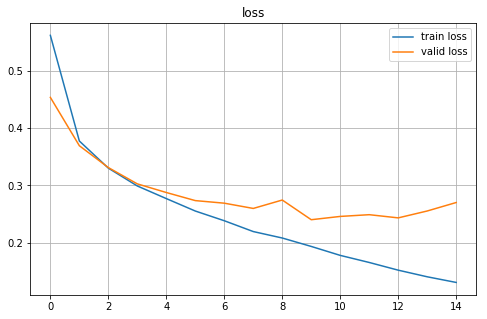

In [194]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

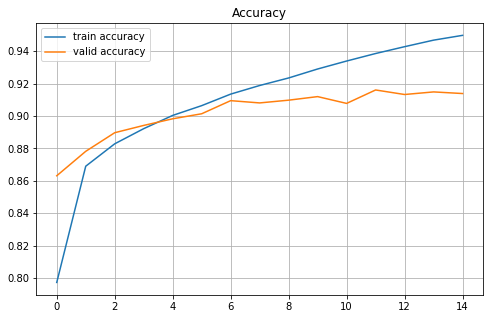

In [132]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [195]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


313/313 - 7s - loss: 0.2793 - accuracy: 0.9067 - 7s/epoch - 21ms/step
 accuracy: 90.67%


**As we can see it seems we have overfitting so lets add 2 dropout layers again**

**Batchsize 128:**

In [156]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation= 'relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    tf.keras.layers.Dropout(0.35),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.35),
    keras.layers.Dense(10, activation="softmax")
    ])
  
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, Y_valid))



Epoch 1/15
391/391 [==============================] - 135s 344ms/step - loss: 0.5822 - accuracy: 0.7864 - val_loss: 0.4192 - val_accuracy: 0.8573
Epoch 2/15
391/391 [==============================] - 143s 366ms/step - loss: 0.3924 - accuracy: 0.8599 - val_loss: 0.3662 - val_accuracy: 0.8714
Epoch 3/15
391/391 [==============================] - 156s 398ms/step - loss: 0.3520 - accuracy: 0.8749 - val_loss: 0.3253 - val_accuracy: 0.8848
Epoch 4/15
391/391 [==============================] - 158s 404ms/step - loss: 0.3231 - accuracy: 0.8841 - val_loss: 0.3174 - val_accuracy: 0.8874
Epoch 5/15
391/391 [==============================] - 157s 401ms/step - loss: 0.3010 - accuracy: 0.8911 - val_loss: 0.3073 - val_accuracy: 0.8929
Epoch 6/15
391/391 [==============================] - 155s 396ms/step - loss: 0.2807 - accuracy: 0.8982 - val_loss: 0.2890 - val_accuracy: 0.9015
Epoch 7/15
391/391 [==============================] - 154s 393ms/step - loss: 0.2663 - accuracy: 0.9035 - val_loss: 0.2787 -

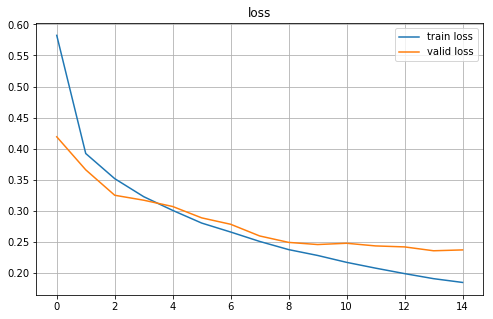

In [158]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

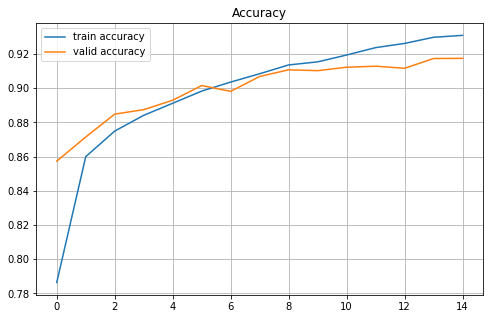

In [159]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [157]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


313/313 - 8s - loss: 0.2528 - accuracy: 0.9084 - 8s/epoch - 26ms/step
 accuracy: 90.84%


**Batchsize 256:**

In [208]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation= 'relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    tf.keras.layers.Dropout(0.35),
    keras.layers.Conv2D(filters=256, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.35),
    keras.layers.Dense(10, activation="softmax")
    ])
  
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=15, batch_size=256,
                  validation_data=(X_valid, Y_valid))

Epoch 1/15
196/196 [==============================] - 136s 691ms/step - loss: 0.6703 - accuracy: 0.7595 - val_loss: 0.4613 - val_accuracy: 0.8325
Epoch 2/15
196/196 [==============================] - 156s 796ms/step - loss: 0.4264 - accuracy: 0.8463 - val_loss: 0.4061 - val_accuracy: 0.8581
Epoch 3/15
196/196 [==============================] - 160s 816ms/step - loss: 0.3840 - accuracy: 0.8631 - val_loss: 0.3790 - val_accuracy: 0.8692
Epoch 4/15
196/196 [==============================] - 156s 797ms/step - loss: 0.3574 - accuracy: 0.8731 - val_loss: 0.3501 - val_accuracy: 0.8783
Epoch 5/15
196/196 [==============================] - 160s 814ms/step - loss: 0.3366 - accuracy: 0.8801 - val_loss: 0.3406 - val_accuracy: 0.8806
Epoch 6/15
196/196 [==============================] - 155s 793ms/step - loss: 0.3211 - accuracy: 0.8865 - val_loss: 0.3249 - val_accuracy: 0.8854
Epoch 7/15
196/196 [==============================] - 155s 792ms/step - loss: 0.3080 - accuracy: 0.8899 - val_loss: 0.3079 -

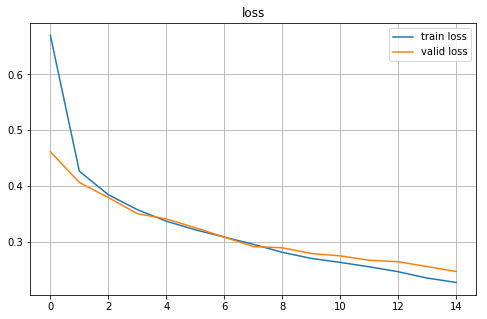

In [209]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['loss'], label='train loss')
    plt.plot(history.epoch,history.history['val_loss'], label='valid loss')
    plt.legend()
    plt.title('loss')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

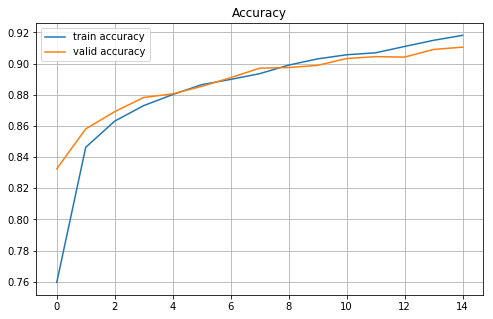

In [210]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.epoch,history.history['accuracy'], label='train accuracy')
    plt.plot(history.epoch,history.history['val_accuracy'], label='valid accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.grid(True)
    plt.show()
plot_learning_curves(history)

In [211]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


313/313 - 7s - loss: 0.2676 - accuracy: 0.9037 - 7s/epoch - 21ms/step
 accuracy: 90.37%


In [216]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [217]:
print(classification_report(Y_test, classes_x))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.85      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.82      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.69      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

